In [2]:
import casadi as ca
import matplotlib.pyplot as plt
import numpy as np


# Static optimization

## Question 2

Solve the optimization probelm numerically

In [3]:
# Define variables 
x = ca.SX.sym('x')
y = ca.SX.sym('y')
z = ca.vertcat(x, y) # We can only solve for one variable, so we stack x and y

b = 10
f = (x - 1)**2 + b * (y - ca.exp(x))**2

# Define NLP
nlp = {'x': z, 'f': f}

# Create solver
solver = ca.nlpsol('solver', 'ipopt', nlp)

# Solve with initial guess
sol = solver(x0=[0, 0])

# Extract solution
x_opt, y_opt = sol['x'].full().flatten()
print(f"Optimal x: {x_opt}")
print(f"Optimal y: {y_opt}")



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

Plot the contour lines and mark the minimum point

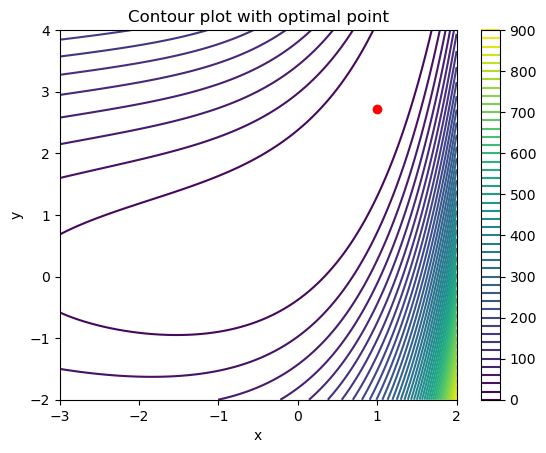

In [12]:
x_opt, y_opt = x_opt, y_opt
f = (x - 1)**2 + b * (y - ca.exp(x))**2

# Plot the contour lines and mark the optimal point
x_vals = np.linspace(-3, 2, 400)
y_vals = np.linspace(-2, 4, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X - 1)**2 + b * (Y - np.exp(X))**2
plt.contour(X, Y, Z, levels=50)
plt.plot(x_opt, y_opt, 'ro')
plt.title('Contour plot with optimal point')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()


## Question 3

Plot the lines contraints

In [14]:
# Define variables 
x = ca.SX.sym('x')
y = ca.SX.sym('y')
z = ca.vertcat(x, y)  # joint optimization variable

b = 10
f = (x - 1)**2 + b * (y - ca.exp(x))**2

# Constraint: x² + y² = s
s = 1.0
g = x**2 + y**2

# Define NLP
nlp = {'x': z, 'f': f, 'g': g}

# Create solver
solver = ca.nlpsol('solver', 'ipopt', nlp)

# Solve with initial guess, and bounds for g
sol = solver(x0=[0, 0],
             lbg=[s],  # lower bound = s
             ubg=[s])  # upper bound = s1

# Extract solution
x_opt, y_opt = sol['x'].full().flatten()
print(f"Optimal x: {x_opt}")
print(f"Optimal y: {y_opt}")

# Get the lagrange multiplier for the constraint
lam_g = sol['lam_g'].full().flatten()
print(f"Lagrange multiplier for the constraint: {lam_g}")


This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.1000000e+01 1.00e+00 2.00e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

/tmp/ipykernel_11623/3293711798.py:27: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  constraint.collections[0].set_label(r'$x^2 + y^2 = {}$'.format(s))


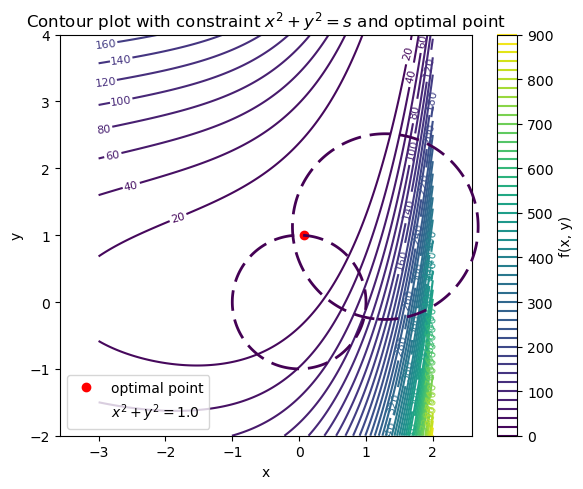

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# --- your existing definitions ---
# assumes: b, x_opt, y_opt are already defined elsewhere
s = 1.0

x_vals = np.linspace(-3, 2, 400)
y_vals = np.linspace(-2, 4, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# objective
Z = (X - 1)**2 + b * (Y - np.exp(X))**2

# --- plot ---
plt.figure(figsize=(6,5))
CS = plt.contour(X, Y, Z, levels=50)
plt.clabel(CS, inline=True, fontsize=8)

# plot g(x,y) = s i.e., x^2 + y^2 = s
constraint = plt.contour(X, Y, X**2 + Y**2, levels=[s], linewidths=2, linestyles='--')

# mark the (presumed) optimal point
plt.plot(x_opt, y_opt, 'ro', label='optimal point')

# legend entry for the constraint
constraint.collections[0].set_label(r'$x^2 + y^2 = {}$'.format(s))
plt.legend(loc='best')

plt.title('Contour plot with constraint $x^2+y^2=s$ and optimal point')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(CS, label='f(x, y)')
plt.axis('equal')  # keep the circle looking like a circle
plt.tight_layout()
plt.show()


In [ ]:
# Define variables 
x = ca.SX.sym('x')
y = ca.SX.sym('y')
z = ca.vertcat(x, y)  # joint optimization variable

b = 10
f = (x - 1)**2 + b * (y - ca.exp(x))**2

# Constraint: x² + y² = s
s = 1.0
g = x**2 + y**2

# Define NLP
nlp = {'x': z, 'f': f, 'g': g}

# Create solver
solver = ca.nlpsol('solver', 'ipopt', nlp)

epsilon = 1e-2
s_lst = [1, 1 + epsilon]


x_lst = []
y_lst = []
f_val_lst = []
lam_g_lst = []
for s in s_lst:
    # Solve with initial guess, and bounds for g
    sol = solver(x0=[0, 0],
                 lbg=[s],  # lower bound = s
                 ubg=[s])  # upper bound = s

    # Extract solution
    x_opt, y_opt = sol['x'].full().flatten()
    lam_g = sol['lam_g'].full().flatten()
    x_lst.append(x_opt)
    y_lst.append(y_opt)
    lam_g_lst.append(lam_g)   
    print(f"Optimal x for s={s}: {x_opt}")
    print(f"Optimal y for s={s}: {y_opt}")

    # Get the lagrange multiplier for the constraint
    lam_g = sol['lam_g'].full().flatten()
    print(f"Lagrange multiplier for the constraint: {lam_g}")

    # Print the function value
    f_val = sol['f'].full().flatten()
    f_val_lst.append(f_val)



This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.1000000e+01 1.00e+00 2.00e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

In [ ]:
print(f_val_lst)

print(f_val_lst[0] - f_val_lst[0]*epsilon)

print("\n\nDifference in f_val :", f_val_lst[1] - f_val_lst[0])
print("Lagrange : ", lam_g_lst[0] * epsilon)
print("Diff : ", np.abs(-(f_val_lst[1] - f_val_lst[0]) - lam_g_lst[0] * epsilon)[0])


[array([0.92074896]), array([0.91275621])]
[0.91154147]


Difference in f_val : [-0.00799275]
Lagrange :  [0.00805242]
Diff :  5.967156061483653e-05


# Completion of the square

### Question 6

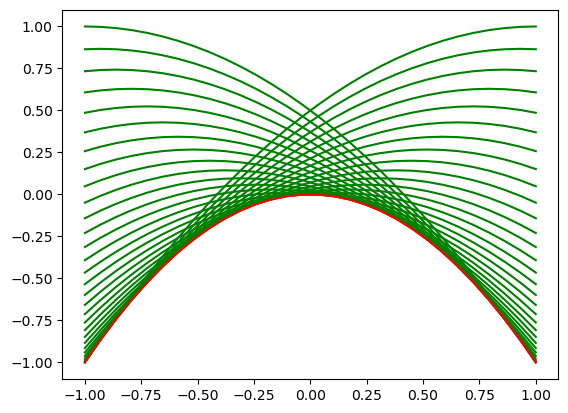

In [ ]:
x_vals = np.linspace(-1, 1, 30)
y_vals = np.linspace(-1, 1, 30)

def quadratic_func(x, y_vals):
    return 0.5*A*x**2+x*B*y_vals[i]+ 0.5 * y_vals[i]**2

for i in np.arange(y_vals.size):
    plt.plot(x_vals, quadratic_func(x_vals, y_vals), 'g')

A = -1
B = 1
C = 1

plt.plot(x_vals,0.5*x_vals**2*(A-B**2/C),'r')

### Qustion 7 